<a href="https://colab.research.google.com/github/ngohuy1811/AIO-Module-4/blob/main/Softmax_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
!gdown 1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt

Downloading...
From (original): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
From (redirected): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4&confirm=t&uuid=f5f20155-4db2-40ef-b955-7a584437bce2
To: /content/creditcard.csv
100% 151M/151M [00:03<00:00, 47.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt
To: /content/Twitter_Data.csv
100% 20.9M/20.9M [00:00<00:00, 79.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
#Đọc dữ liệu:
dataset_path = '/content/creditcard.csv'
df = pd.read_csv(dataset_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Tách biến X,y:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:,:-1].astype(np.float64 ), dataset_arr[:,-1].astype(np.uint8)

In [ ]:
#Adding bias:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

#One-hot encoding label:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [ ]:
#Chia tập train, val, test:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split(
    X_b, y_encoded,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [ ]:
#Chuẩn hóa dữ liệu:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

In [ ]:
#Các hàm quan trọng:
#Softmax:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z/exp_z.sum(axis=1)[:,None]

#Hàm dự đoán:
def predict(X, theta):
    z=np.dot(X,theta)
    y_hat=softmax(z)
    return y_hat

#Hàm tính loss:
def compute_loss(y_hat,y):
    n = y.size
    return (-1/n)*np.sum(y*np.log(y_hat))

#Hàm tính gradient:
def compute_gradient(X, y, y_hat ):
    n = y.size
    return np.dot(X.T,(y_hat-y))/n

#Hàm cập nhật trọng số:
def update_theta(theta,gradient,lr):
    return theta-lr*gradient

#Hàm tính accuracty:
def compute_accuracy(X, y, theta):
    y_hat = predict (X, theta)
    acc = (np.argmax(y_hat,axis =1) == np.argmax(y, axis =1)).mean()
    return acc

In [ ]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat , y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta,gradient,lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy( X_train , y_train , theta )
        train_batch_accs.append( train_acc )

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val , theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum( val_batch_losses ) / len( val_batch_losses )
    train_batch_acc = sum( train_batch_accs ) / len( train_batch_accs )
    val_batch_acc = sum( val_batch_accs ) / len( val_batch_accs )

    train_losses.append( train_batch_loss )
    val_losses.append( val_batch_loss )
    train_accs.append( train_batch_acc )
    val_accs.append( val_batch_acc )

    print (f'\nEPOCH {epoch+1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: { val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.115	Validation loss: 0.113

EPOCH 2:	Training loss: 0.081	Validation loss: 0.080

EPOCH 3:	Training loss: 0.062	Validation loss: 0.061

EPOCH 4:	Training loss: 0.049	Validation loss: 0.049

EPOCH 5:	Training loss: 0.041	Validation loss: 0.041

EPOCH 6:	Training loss: 0.035	Validation loss: 0.035

EPOCH 7:	Training loss: 0.031	Validation loss: 0.031

EPOCH 8:	Training loss: 0.028	Validation loss: 0.027

EPOCH 9:	Training loss: 0.025	Validation loss: 0.025

EPOCH 10:	Training loss: 0.023	Validation loss: 0.023

EPOCH 11:	Training loss: 0.021	Validation loss: 0.021

EPOCH 12:	Training loss: 0.020	Validation loss: 0.020

EPOCH 13:	Training loss: 0.019	Validation loss: 0.018

EPOCH 14:	Training loss: 0.017	Validation loss: 0.017

EPOCH 15:	Training loss: 0.017	Validation loss: 0.016

EPOCH 16:	Training loss: 0.016	Validation loss: 0.015

EPOCH 17:	Training loss: 0.015	Validation loss: 0.015

EPOCH 18:	Training loss: 0.014	Validation loss: 0.014

EPOCH 19:	Training

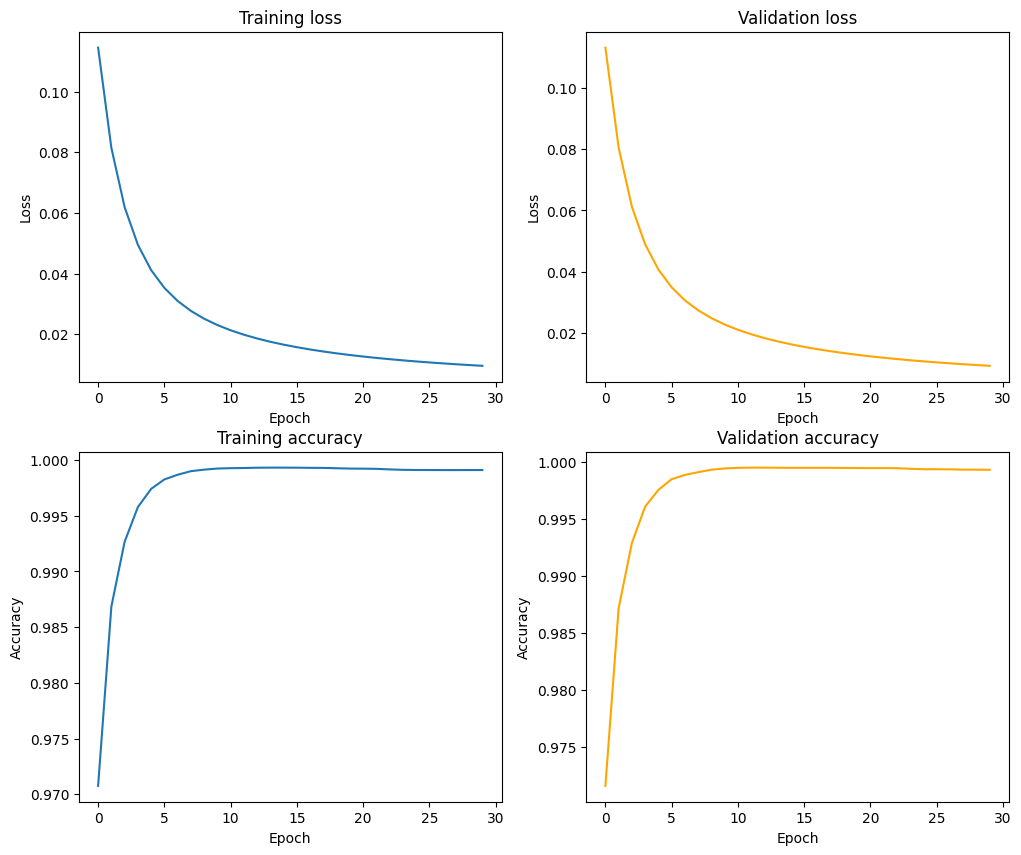

In [ ]:
fig,ax = plt.subplots(2,2,figsize =(12,10))
ax [0,0].plot(train_losses)
ax [0,0].set(xlabel ='Epoch', ylabel ='Loss')
ax [0,0].set_title('Training loss')

ax [0,1].plot(val_losses, 'orange')
ax [0,1].set(xlabel ='Epoch', ylabel ='Loss')
ax [0,1].set_title('Validation loss')

ax [1,0].plot(train_accs)
ax [1,0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax [1,0].set_title('Training accuracy')

ax [1,1].plot(val_accs, 'orange')
ax [1,1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax [1,1].set_title('Validation accuracy')

plt.show()

In [ ]:
#Model Validation:
val_set_acc = compute_accuracy(X_val , y_val , theta)
test_set_acc = compute_accuracy(X_test , y_test , theta)
print ('Evaluation on validation and test set :')
print (f'Validation set accuracy: {val_set_acc:.3f}')
print (f'Test set accuracy: {test_set_acc:.3f}')


Evaluation on validation and test set :
Validation set accuracy: 0.999
Test set accuracy: 0.999


# **Twitter Sentiment**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Đọc dữ liệu:
dataset_path = '/content/Twitter_Data.csv'
df = pd.read_csv(dataset_path)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df = df.dropna()

In [ ]:
#Tiền xử lý dữ liệu:
def text_normalize(text):
    text = text.lower()

    # Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+','', text )

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]','', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [ ]:
# Khởi tạo tf-idf vectorizer:
vectorizer = TfidfVectorizer(max_features =2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [ ]:
#Adding bias:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

#One-hot encoding label:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [ ]:
#Chia tập train, val, test:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split(
    X_b, y_encoded,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [ ]:
#Các hàm quan trọng:
#Softmax:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z/exp_z.sum(axis=1)[:,None]

#Hàm dự đoán:
def predict(X, theta):
    z=np.dot(X,theta)
    y_hat=softmax(z)
    return y_hat

#Hàm tính loss:
def compute_loss(y_hat,y):
    n = y.size
    return (-1/n)*np.sum(y*np.log(y_hat))

#Hàm tính gradient:
def compute_gradient(X, y, y_hat ):
    n = y.size
    return np.dot(X.T,(y_hat-y))/n

#Hàm cập nhật trọng số:
def update_theta(theta,gradient,lr):
    return theta-lr*gradient

#Hàm tính accuracty:
def compute_accuracy(X, y, theta):
    y_hat = predict (X, theta)
    acc = (np.argmax(y_hat,axis =1) == np.argmax(y, axis =1)).mean()
    return acc

In [ ]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat , y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta,gradient,lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train , y_train , theta)
        train_batch_accs.append( train_acc )

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val , theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum( val_batch_losses ) / len( val_batch_losses )
    train_batch_acc = sum( train_batch_accs ) / len( train_batch_accs )
    val_batch_acc = sum( val_batch_accs ) / len( val_batch_accs )

    train_losses.append( train_batch_loss )
    val_losses.append( val_batch_loss )
    train_accs.append( train_batch_acc )
    val_accs.append( val_batch_acc )

    print (f'\nEPOCH {epoch+1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: { val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.377	Validation loss: 0.376

EPOCH 2:	Training loss: 0.377	Validation loss: 0.376

EPOCH 3:	Training loss: 0.377	Validation loss: 0.376

EPOCH 4:	Training loss: 0.376	Validation loss: 0.375

EPOCH 5:	Training loss: 0.376	Validation loss: 0.375

EPOCH 6:	Training loss: 0.376	Validation loss: 0.375

EPOCH 7:	Training loss: 0.375	Validation loss: 0.374

EPOCH 8:	Training loss: 0.375	Validation loss: 0.374

EPOCH 9:	Training loss: 0.375	Validation loss: 0.374

EPOCH 10:	Training loss: 0.374	Validation loss: 0.373

EPOCH 11:	Training loss: 0.374	Validation loss: 0.373

EPOCH 12:	Training loss: 0.374	Validation loss: 0.373

EPOCH 13:	Training loss: 0.374	Validation loss: 0.373

EPOCH 14:	Training loss: 0.373	Validation loss: 0.372

EPOCH 15:	Training loss: 0.373	Validation loss: 0.372

EPOCH 16:	Training loss: 0.373	Validation loss: 0.372

EPOCH 17:	Training loss: 0.372	Validation loss: 0.372

EPOCH 18:	Training loss: 0.372	Validation loss: 0.371

EPOCH 19:	Training

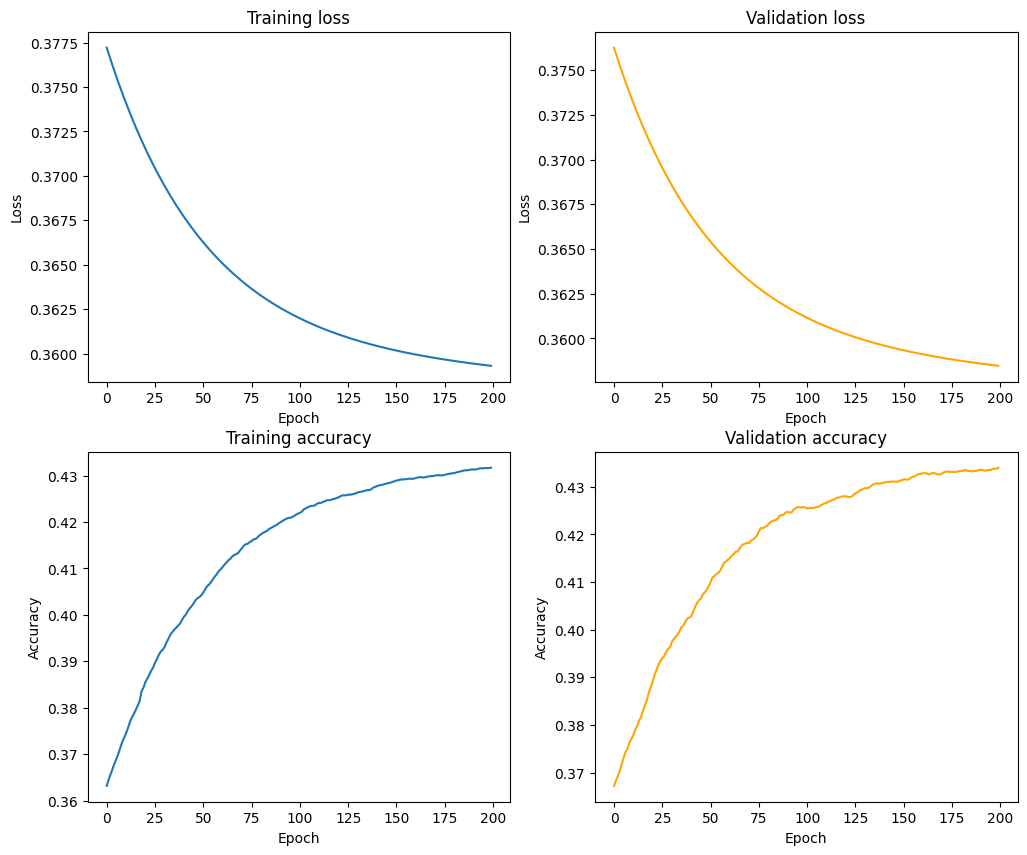

In [ ]:
fig,ax = plt.subplots(2,2,figsize =(12,10))
ax [0,0].plot(train_losses)
ax [0,0].set(xlabel ='Epoch', ylabel ='Loss')
ax [0,0].set_title('Training loss')

ax [0,1].plot(val_losses, 'orange')
ax [0,1].set(xlabel ='Epoch', ylabel ='Loss')
ax [0,1].set_title('Validation loss')

ax [1,0].plot(train_accs)
ax [1,0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax [1,0].set_title('Training accuracy')

ax [1,1].plot(val_accs, 'orange')
ax [1,1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax [1,1].set_title('Validation accuracy')

plt.show()

In [ ]:
#Model Validation:
val_set_acc = compute_accuracy(X_val , y_val , theta)
test_set_acc = compute_accuracy(X_test , y_test , theta)
print ('Evaluation on validation and test set :')
print (f'Validation set accuracy: {val_set_acc}')
print (f'Test set accuracy: {test_set_acc}')

Evaluation on validation and test set :
Validation set accuracy: 0.4340369393139842
Test set accuracy: 0.4322881511934712


# **Multiple Choide**

In [1]:
import numpy as np

In [2]:
#Các hàm quan trọng:
#Softmax:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z/exp_z.sum(axis=1)[:,None]

#Hàm dự đoán:
def predict(X, theta):
    z=np.dot(X,theta)
    y_hat=softmax(z)
    return y_hat

#Hàm tính loss:
def compute_loss(y_hat,y):
    n = y.size
    return (-1/n)*np.sum(y*np.log(y_hat))

#Hàm tính gradient:
def compute_gradient(X, y, y_hat ):
    n = y.size
    return np.dot(X.T,(y_hat-y))/n

#Hàm cập nhật trọng số:
def update_theta(theta,gradient,lr):
    return theta-lr*gradient

#Hàm tính accuracty:
def compute_accuracy(X, y, theta):
    y_hat = predict (X, theta)
    acc = (np.argmax(y_hat,axis =1) == np.argmax(y, axis =1)).mean()
    return acc

In [9]:
y_hat = np.array((0.4, 0.15, 0.05, 0.4))
y = np.array((1, 0, 0, 0))

def cross_entropy_loss(y, y_hat):

    index = np.argmax(y)
    # Tính toán cross-entropy loss
    loss = -np.log(y_hat[index])
    # Làm tròn đến hàng thập phân thứ 3
    return round(loss, 3)


loss = cross_entropy_loss(y, y_hat)
print(loss)


0.916


In [15]:
z = np.array([-1, -2, 3, 2])

def softmax_func(z):
    exp_z = np.exp(z)
    return exp_z/exp_z.sum()

output = softmax_func(z)
print(np.round(output,3))

[0.013 0.005 0.718 0.264]


In [19]:
y_hat = np.array([0, 1, 3, 2, 0, 2, 1, 2])
y = np.array([0, 0, 3, 2, 1, 2, 2, 1])

def accuracy_func(y, y_hat):
    acc = (y_hat == y).mean()
    return acc

acc = accuracy_func(y, y_hat)
print(acc)

0.5
